In [2]:
import cv2 
import numpy as np 
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import pylab as pl
image= input('请用户输入图片')
img=Image.open(image)
#img.show()

请用户输入图片001.jpg


~~~~~~~~~欢迎！！！~~~~~~~~~
~~~~~~~功能选择~~~~~~~

        0 退出
        1 改变亮度
        2 修改对比度
        3 灰度调节
        4 模糊调节
        5 浮雕效果
        6 边缘检测
        
请输入编号4
模糊调节成功
~~~~~~~功能选择~~~~~~~

        0 退出
        1 改变亮度
        2 修改对比度
        3 灰度调节
        4 模糊调节
        5 浮雕效果
        6 边缘检测
        
请输入编号6


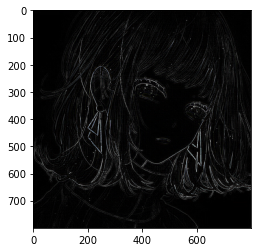

(800, 800, 3)
坐标轴图像如下：


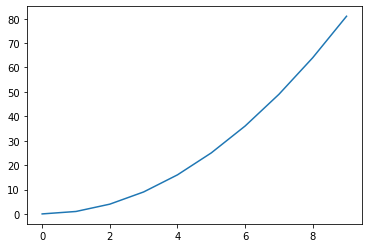

边缘检测成功
~~~~~~~功能选择~~~~~~~

        0 退出
        1 改变亮度
        2 修改对比度
        3 灰度调节
        4 模糊调节
        5 浮雕效果
        6 边缘检测
        
请输入编号5
浮雕效果调节成功
~~~~~~~功能选择~~~~~~~

        0 退出
        1 改变亮度
        2 修改对比度
        3 灰度调节
        4 模糊调节
        5 浮雕效果
        6 边缘检测
        
请输入编号0


In [4]:
# 亮度调节
# g(x,y) = a*f(x,y)+b
# a参数（a>0）表示放大的倍数（一般在0.0~3.0之间）
# b参数一般称为偏置，用来调节亮度
class Sjfx:
    print('~~~~~~~~~欢迎！！！~~~~~~~~~')
    def ChangeLigtht():
        #读取图像
        b=20
        image1=cv2.imread(image)
        row,col,channel=image1.shape
        res = image1.copy()
        for i in range(row):
            for j in range(col):
                for k in range(3):
                    c =image1[i][j][k]+ b
                    if c > 255:
                        res[i][j][k] = 255
                    elif c< 0 :
                        res[i,j][k] = 0
        cv2.imwrite("Light.jpg",res)
        cv2.imshow("Light.jpg",res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print('亮度调节成功')


    def Contrast():
        image2=cv2.imread(image)
        res=np.uint8(np.clip((1.5*image2),0,255))  #1.5对比度
        cv2.imwrite("contrast.jpg",res)
        cv2.imshow("contrast.jpg",res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print('对比度调节成功')


    def Gray():
     #图像读取为数组形式
        img_array=cv2.imread(image)
    #将数组转换为列表
        list1=img_array.tolist()
        img_list=None
        list_gray = []
        col=len(list1)
        row=len(list1[0])
        for i in range(col):
            list_t=[]
            for j in range(row):
                a=list1[i][j][0] * 0.299 + list1[i][j][1] * 0.587 + list1[i][j][2] * 0.114
                list_t.append(int(a))
            list_gray.append(list_t)
        #print(list_gray)
    # 将列表转换为图像单通道的数组
        img_array_make=np.array(list_gray,dtype=np.uint8)
        # 图像展示
        cv2.imshow('huidu_img',img_array_make)
        cv2.waitKey() 
        cv2.destroyAllWindows()
        print('灰度调节成功')

        
        '''
        高斯模糊：在进行均值模糊的时候，其领域类的每个像素权重是相等的，高斯模糊中，会将中心点的权重值加大，
                  远离中心点的值减小，在此基础上计算各个领域内各个像素值不同权重的和
        格式：cv2.Gaussianblur(img,(n1,n2),0) img表示图片，n1表示x方向卷积核大小，n2表示y方向卷积核大小，
              数值可以不同，但都应为正奇数,0代表内核大小取(n1,n2)
        '''
    def Mohu():
        # 3.高斯模糊
        image2 = cv2.imread(image)
        gaussianblur = cv2.GaussianBlur(image2,(5,5),0)
        cv2.imshow('image2',image2)
        cv2.imshow('gaussianblur',gaussianblur)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print('模糊调节成功')


    '''
    [100；00 0；00-1]； 假设原图像为X，处理后的图像为Y ，对于坐标为 (i,j)点，
    其浮雕效果图的算法为Y (i,j)=X (i-1,j-1)-X (i+1,j+1)+128。
    '''
    #相邻的像素点进行做差求值。之后再加上128（灰度值的平均值）
    def Fudiao():

        #读取图像
        image3=cv2.imread(image)
        #获取图像的高度和宽度
        height,width=image3.shape[:2]
        #图像灰度处理
        gray=cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
        #创建目标图像
        Img=np.zeros((height,width,1),np.uint8)
        #浮雕特效算法
        for k in range(0,height):
            for l in range(0,width-1):
                grayCurrentPixel=int(gray[k,l])
                grayNextPixel=int(gray[k,l+1])
                newPixel=grayCurrentPixel-grayNextPixel+128
                if newPixel>255:
                    newPixel=255
                if newPixel<0:
                    newPixel=0
                Img[k,l]=newPixel
                #保存浮雕效果图片
        cv2.imwrite('fudiao.jpg',Img)
        #显示浮雕效果的图片
        cv2.imshow('fudia.jpg',Img)
        #等待显示
        cv2.waitKey() 
        cv2.destroyAllWindows()
        print('浮雕效果调节成功')
        
    def Bianyuan():
        # 加载原图
        image4=cv2.imread(image)
        #定义卷积核，对图像进行边缘检测
        kernel = np.array([ [-1,-1, -1], [-1, 8, -1],[-1,-1, -1]])

        #使用OpenCV内置的卷积函数
        img5 = cv2.filter2D(image4,-1,kernel) 
        #显示卷积后的图像
        plt.imshow(img5) 
        plt.show()
        print(img5.shape)
        x = range(10) # 横轴的数据
        y = [i*i for i in x] # 纵轴的数据
        pl.plot(x, y) # 调用pylab的plot函数绘制曲线
        print('坐标轴图像如下：')
        pl.show() # 显示绘制出的坐标轴图像
        print('边缘检测成功')

    while True:
        print('~~~~~~~功能选择~~~~~~~')
        print("""
        0 退出
        1 改变亮度
        2 修改对比度
        3 灰度调节
        4 模糊调节
        5 浮雕效果
        6 边缘检测
        """)
        choice = input('请输入编号').strip()
        if not choice.isdigit():
            print('请输入编号')
            continue
        if choice=='0':
            break
        if choice == '1':
            ChangeLigtht()
        if choice == '2':
            Contrast()
        if choice == '3':
            Gray()
        if choice == '4':
            Mohu()
        if choice == '5':
            Fudiao()
        if choice == '6':
            Bianyuan()